**CONCURRENCY IN PYTHON**
**Learning Outcomes**

In this lab you will learn

1.   The concept of a Thread in Python
2.   How to create and join threads
3.   How lack of synchronisation between threads can lead to race conditions.
4.   To work with the `multiprocessing` package in Python.
5.   To appreciate the trade-off between the complexity introduced by concurrency and the gains obtained in programme execution time.



**Setup** 

1.   Turn one line numbers in code blocks by going to Tools -> Settings -> Editor -> **show line numbers**. 
2.   Run the Python code below. It contains 3 threads: `main`, `threadA` and `threadB`. The `main` thread does not wait for `threadA` and `threadB` to finish.

**Code Block 01**

In [3]:
import time
import threading

def testfuncA(name):
  print(f'testfuncA started with {name}')
  time.sleep(10)
  print('testfuncA ended')  

def testfuncB(name):
  print(f'testfuncB started with {name}')
  time.sleep(10)
  print('testfuncB ended')
  
if __name__ == '__main__':
    time1 = time.time()
    print('main started')
    threadA = threading.Thread(target=testfuncA, args=['ABC'])
    threadA.start()
    threadB = threading.Thread(target=testfuncB, args=['DEF'])
    threadB.start()
    threadA.join()
    threadB.join()
    runTime = time.time() - time1
    print(f"main ended in {round(runTime, 4)} sec")

main started
testfuncA started with ABC
testfuncB started with DEF
testfuncA ended
testfuncB ended
main ended in 10.012 sec


**Task 6.1**
You can make the `main` thread wait for another thread by using the `Thread.join()` method. Add the commands given below after the `threadB.start()` command (Line-20) in *Code Block 01* and examine any changes to your runtime.


```
threadA.join()
threadB.join()
```



The purpose of the `Thread.join()` method is to block the calling/current thread until the target thread, that is being joined, has terminated. Explore this concept in "Code Block 01" by making minor modifications to it to make sure you understand this concept. 

**Task 6.2**
1.   Modify "Code Block 02" so that `threadB` is called from inside `testfuncA`, instead of the `main`. 
2.   `testfuncA` should wait for `threadB` to complete before moving on.
3.   Answer **Quiz Q1** related to this task.





**Code Block 02**

In [2]:
import time
import threading

def testfuncA(name, sleepTime):
    print(f'testfuncA started with {name}')
    #6.2
    threadB = threading.Thread(target=testfuncB, args=['DEF', 5])
    threadB.start()
    threadB.join()
    time.sleep(sleepTime)
    print('testfuncA ended')  
    
def testfuncB(name, sleepTime):
  print(f'testfuncB started with {name}')
  time.sleep(sleepTime)
  print('testfuncB ended')  

if __name__ == '__main__':
    time1 = time.time()
    print('main started')
    threadA = threading.Thread(target=testfuncA, args=['ABC', 5])  
#     threadB = threading.Thread(target=testfuncB, args=['DEF', 2])
    threadA.start()      
#     threadB.start()
    threadA.join()
#     threadB.join()   
    runTime = time.time() - time1
    print(f"main ended in {round(runTime, 4)} sec")

main started
testfuncA started with ABC
testfuncB started with DEF
testfuncB ended
testfuncA ended
main ended in 10.009 sec


**RACE CONDITIONS**

Introducing concurrency via threads can substantially decrease runtimes. However, it can also introduce bugs if there is no coordination between multiple threads. Race conditions occur when multiple threads have access to the same data. The code below assigns an initial value of 0 to the variable `shared_var`. This variable is shared between two threads; `incThread` increments its value by 1 million, `decThread` decrements its value by 1 million. 



1.   Run Code Block 03 multiple times and note value of `shared_var`.
2.   You should see a different value after each run of the programme.
3.   The result should be 0 but no coordination between `incThread` and `decThread` results in a race condition. Do some thinking about why the result is not zero.



**Code Block 03**

In [4]:
import threading
 
# thread based operations on shared data
def increment(nOperations):   
    thread_lock.acquire()
    global shared_var
    for _ in range(nOperations):
        shared_var += 1   
    thread_lock.release()

def decrement(nOperations):
    thread_lock.acquire()
    global shared_var
    for _ in range(nOperations):
        shared_var -= 1
    thread_lock.release()
  
if __name__ == '__main__':
  # define a shared variable
    shared_var = 0 
    thread_lock = threading.Lock()
  # Thread1 increment 1 million times
    incThread = threading.Thread(target=increment, args=[1000000])
    incThread.start()
  # Thread2 deccrement 1 million times
    decThread = threading.Thread(target=decrement, args=[1000000])
    decThread.start()
    incThread.join()
    decThread.join()
  # Print value of shared_var
    print(f'Shared Variable: {shared_var}')

Shared Variable: 0


**Task 6.3**


*   You can avoid a race conditions by creating a thread lock and giving it to a thread while it's operating on the shared data. Other threads (not in control of the lock) will not be able to access the shared data, until the lock is released.
*   Make CODE BLOCK 03 thread safe by creating a lock and giving it to the appropriate thread when needed.
*   A lock object can be created by using the following command: `thread_lock = threading.Lock()`
*   A thread can acquire a lock using `thread_lock.acquire()`.
*   After it's done making changes to shared data, a thread must return the acquired lock using `thread_lock.release()`
*   Add a thread lock, acquire and release mechanism to CODE BLOCK 03 such that only one thread has access to `shared_var` at one time. If this mechanism is implemented correctly, the value of `shared_var` should be equal to zero at the end of the programme.
*   Answer **Quiz Q2** related to this task.



**MULTIPROCESSING**


*   CPU-bound (or Compute-bound) tasks consist of large numerical tasks e.g; large matrix calculations, many image processing and graphics operations. 
*   If such tasks can be broken into indepedent tasks, then we can run them in parallel on different CPUs.
*   Python's `multiprocessing` package allows us to run tasks in parallel over multiple CPUs. You can find the number of CPUs available using the commands below.



In [4]:
#find number of CPUs
import multiprocessing
n_cpus = multiprocessing.cpu_count()
print(f'Number of CPUs avaialble: {n_cpus}')

Number of CPUs avaialble: 12


If you're running this in a free Google Colab account then you should have 
2 CPUs. If you're running this in Python on your own laptop (outside Colab) then the number of CPUs may be greater.

**Task 6.3**


*   Run the programmes in Code Blocks 4a and 4b and observe the output.
*   Both programmes take a few seconds to complete so you will need to wait a few seconds for the outputs.
*   Which programme executes faster?
*   Read the comments in both programmes and try to understand how each programme works.



**Code Block 4a**

In [5]:
# Sequential Matrix Multiplication
# Runs two Matrix Multiplication tasks in sequence on 1 CPU
import multiprocessing
import time
import numpy as np

def prod_func1(rowcols):
  m1 = np.random.randint(0, 20, (rowcols, rowcols)) #create square matrix of random ints
  m2 = np.random.randint(0, 20, (rowcols, rowcols)) #create square matrix of random ints 
  m3 = np.matmul(m1, m2)    #multiply m1 and m2
  process_time = 0.0075                   #synthetic delay
  time.sleep(process_time)            
  pid = multiprocessing.current_process().pid  #get process ID
  print(f"Process-{pid} Done!")

def main():
  time1 = time.time()
  rowcols = 100
 
  prod_func1(rowcols)
  prod_func1(rowcols)

  runTime = time.time() - time1
  print(f"main ended in {round(runTime, 4)} sec")

if __name__ == "__main__":
  main()

Process-2948 Done!
Process-2948 Done!
main ended in 0.0183 sec


**Code Block 4b**

In [6]:
# Parallel Matrix Multiplication
# Runs two Matrix Multiplication tasks in parallel on 2 CPUs
import multiprocessing
import numpy as np
import time

def prod_func2(rowcols):
  m1 = np.random.randint(0, 20, (rowcols, rowcols))  #create square matrix of random ints
  m2 = np.random.randint(0, 20, (rowcols, rowcols))  #create square matrix of random ints
  m3 = np.matmul(m1, m2)      #multiply m1 and m2
  process_time = 0.0075       #synthetic delay
  time.sleep(process_time)              
  pid = multiprocessing.current_process().pid  #get process ID
  print(f"\nProcess-{pid} Done!\n")

def main():
  time1 = time.time()
  rowcols = 100
  pool = multiprocessing.Pool(multiprocessing.cpu_count())
  print(f"Available CPUs: {multiprocessing.cpu_count()}")
  argsList = [rowcols, rowcols]
  pool.map(prod_func2, argsList) #apply prod_func2 (in parallel) to elements in argsList
  
  runTime = time.time() - time1
  print(f"main ended in {round(runTime, 4)} sec")

if __name__ == "__main__":
  main()


Process-3164 Done!

Process-3165 Done!


Available CPUs: 12
main ended in 0.0691 sec


**Task 6.4**




1.   Run both programmes in Code Blocks 4a five times and note down the total runtime that you see. Take the average of your 5 readings.
2.   Run both programmes in Code Blocks 4b five times and note down the total runtime that you see. Take the average of your 5 readings.
3.   Repeat step-1 and step-2 for the following values `process_time`: 1, 5, 8.
4.   Plot your results using your favourite plotting/graphing tool and bring a digital copy to the next lab. You will need it to answer **Quiz Q3**. 

**NOTE:** Your plots should be based on your own results. Submissions demonstrating effort will receive a higher grade. Do not copy from any other sources. A sample plot (created in MS Excel) is shown below. 

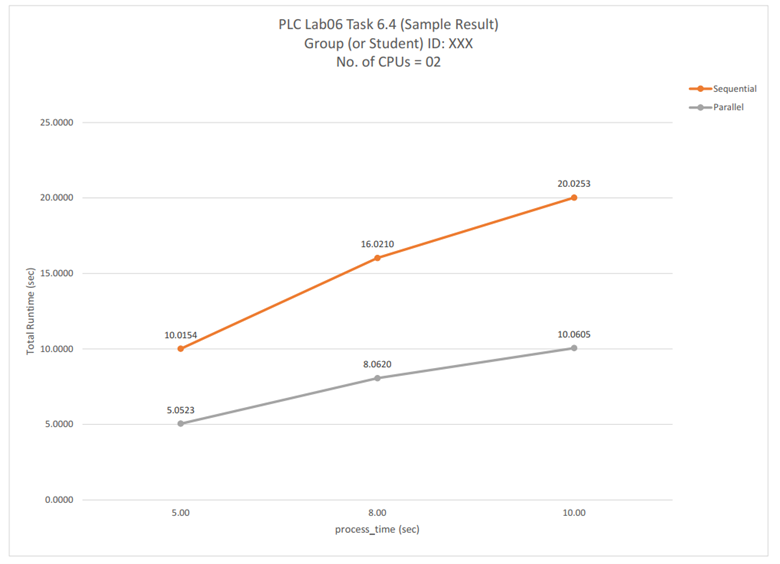






**Task 6.5**


1.   The figure below shows the total runtime I observed when `process_time` is reduced to much lower values. 
2.   Comment on why the parallel programme become slower compared to the sequential programme? Think in terms of overhead and processing time.
3.  Bring your answer to next week's lab, you will need it for **Quiz Q4**.
4.  **NOTE:** Do Not copy from other sources.



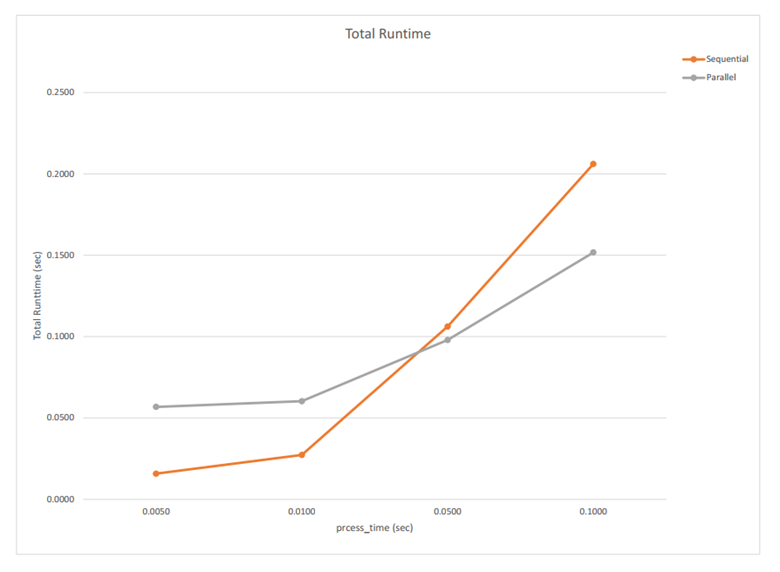